# 0. Content

This script contains the following procedures:
+ removing and renaming columns 
+ standardizing data
+ Principal Components Analysis
+ elbow technique
+ k-means algorithm 
+ scatterplot visal analysis
+ k-mean cluster descriptive statistics 

# 1. Importing Libraries and Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl


In [2]:
# automatically show plots
%matplotlib inline

In [3]:
# creating main path
path = r'C:\Users\muffi\OneDrive\CareerFoundry\World Happiness Index Analysis 2023'

In [4]:
# importing World Happiness Report merged df
df_whia = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'all_years_merged.csv'))
df_whia.shape

(1859, 14)

# 1. Preparing Data for Analysis

In [5]:
# checking df columns 
df_whia.columns

Index(['Unnamed: 0', 'country', 'region', 'year', 'happiness_score',
       'log_gdp_score', 'social_support_score', 'life_expectancy_at_birth',
       'freedom_score', 'generosity_score', 'corruption_score', 'gdp_usd',
       'gdp_capita_usd', 'population'],
      dtype='object')

In [6]:
# dropping unnamed col
df_whia_rel = df_whia.drop(columns = ['Unnamed: 0', 'country', 'region', 'year'])

## 1.2. Standardizing Data

In [7]:
df_whia_rel.head()

,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score,gdp_usd,gdp_capita_usd,population
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,1.010931e+10,364.663542,2.772228e+07
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,1.241616e+10,437.268740,2.839481e+07
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,1.585668e+10,543.306526,2.918551e+07
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,1.780511e+10,591.190030,3.011741e+07
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,1.990732e+10,638.845852,3.116138e+07


In [8]:
# define standard scaler
scaler = StandardScaler()

In [9]:
# transform data
whia_stan = scaler.fit_transform(df_whia_rel)

In [10]:
# creating a principal compments analysis class
pca = PCA()

In [11]:
# fitting the standardized data to the PCA 
pca.fit(whia_stan)

PCA()

In [12]:
# viewign the variance from component to component
score = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

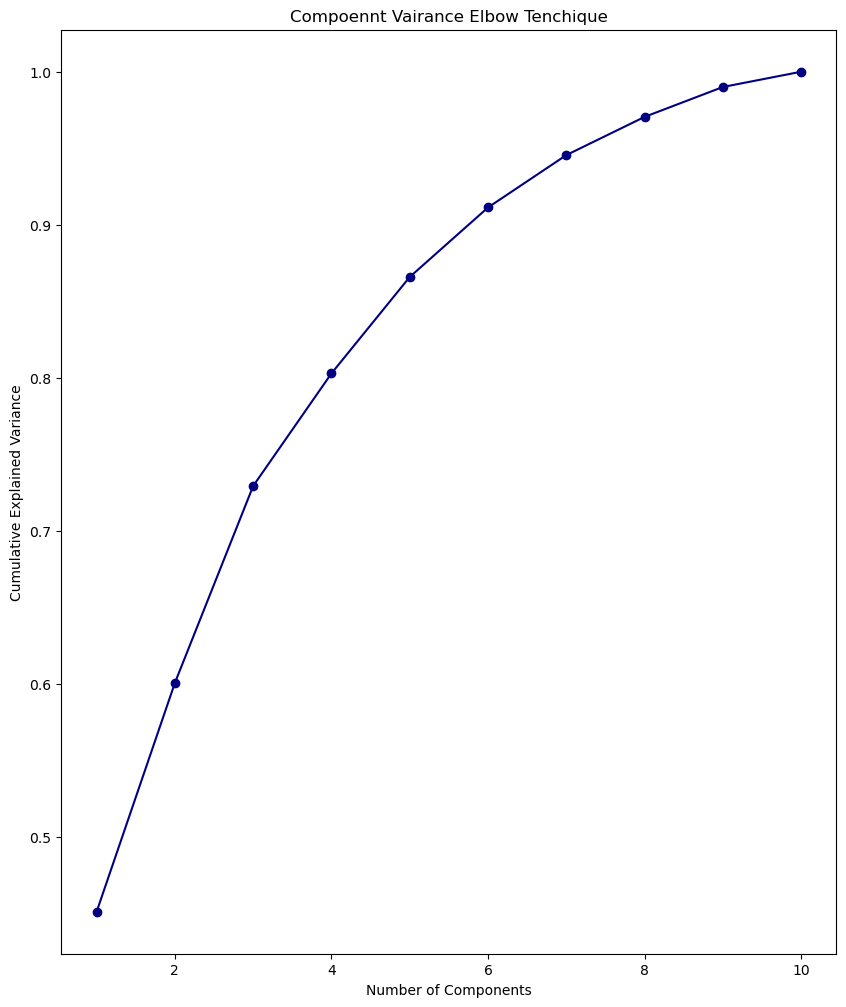

In [15]:
# viewing the components to see how many are needed
plt.figure(figsize = (10,12))
plt.plot(range(1,11), score.cumsum(), marker = 'o', color = 'navy')
plt.title('Compoennt Vairance Elbow Tenchique')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Accorind to the graph, we only need 4 components

In [16]:
# choosing 4 components
pca_whia = PCA(n_components = 4)

In [17]:
# fitting the model to the selected number of components
pca_whia.fit(whia_stan)

PCA(n_components=4)

In [18]:
# getting the component scores
scores_pca = pca_whia.transform(whia_stan)

# 2. Elbow Technique

In [19]:
# fitting the k-menans using the transformed PCA data
wcss = []
for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\muffi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Text(0, 0.5, 'WCSS')

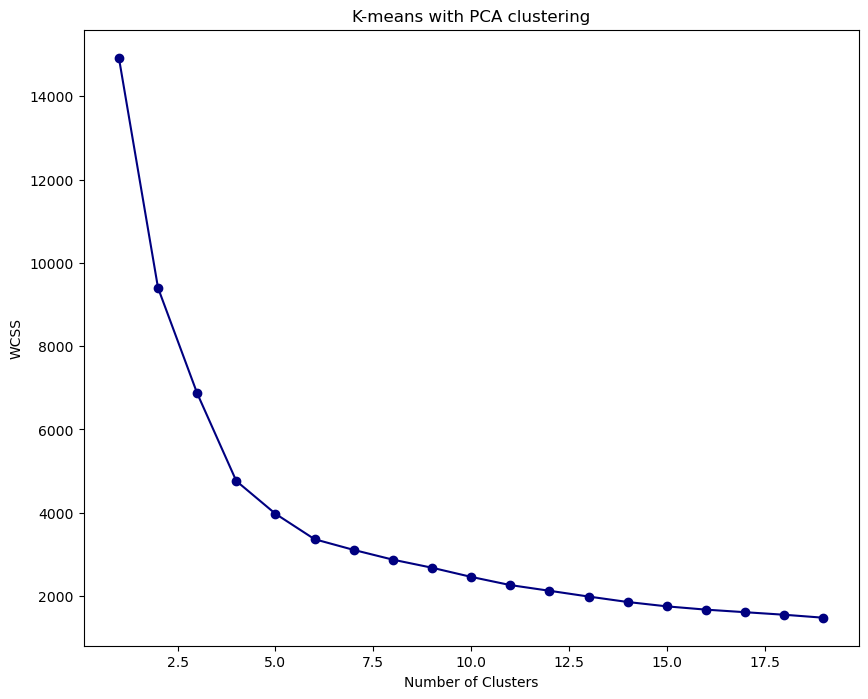

In [20]:
# viewing the clusters to see how many are needed
plt.figure(figsize = (10,8))
plt.plot(range(1,20), wcss, marker = 'o', color = 'navy')
plt.title('K-means with PCA clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

The elbow begins to bend after 4 clusters 

# 3. K-means Clustering

In [21]:
# creating a k-means object
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [22]:
# fitting the k-means with the PCA model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [23]:
# adding the clusters to the df
df_whia_rel['clusters'] = kmeans_pca.labels_

In [24]:
# snapshot of the df
df_whia_rel.head()

,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score,gdp_usd,gdp_capita_usd,population,clusters
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,1.010931e+10,364.663542,2.772228e+07,1
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,1.241616e+10,437.268740,2.839481e+07,1
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,1.585668e+10,543.306526,2.918551e+07,1
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,1.780511e+10,591.190030,3.011741e+07,1
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,1.990732e+10,638.845852,3.116138e+07,1


In [25]:
# checking the clusters 
df_whia_rel['clusters'].value_counts(dropna = False)

0    939
1    549
2    323
3     48
Name: clusters, dtype: int64

In [26]:
# adding components to the df
df_whia_pca_kmeans = pd.concat([df_whia_rel, pd.DataFrame(scores_pca)], axis = 1)

In [27]:
# renaming the component col names 
df_whia_pca_kmeans = df_whia_pca_kmeans.rename(columns = {0:'Component 1', 1:'Component 2', 2:'Component 3', 3:'Component 4'})

# 4. Visual Exploration

Text(0.5, 1.0, 'Happiness vs GDP')

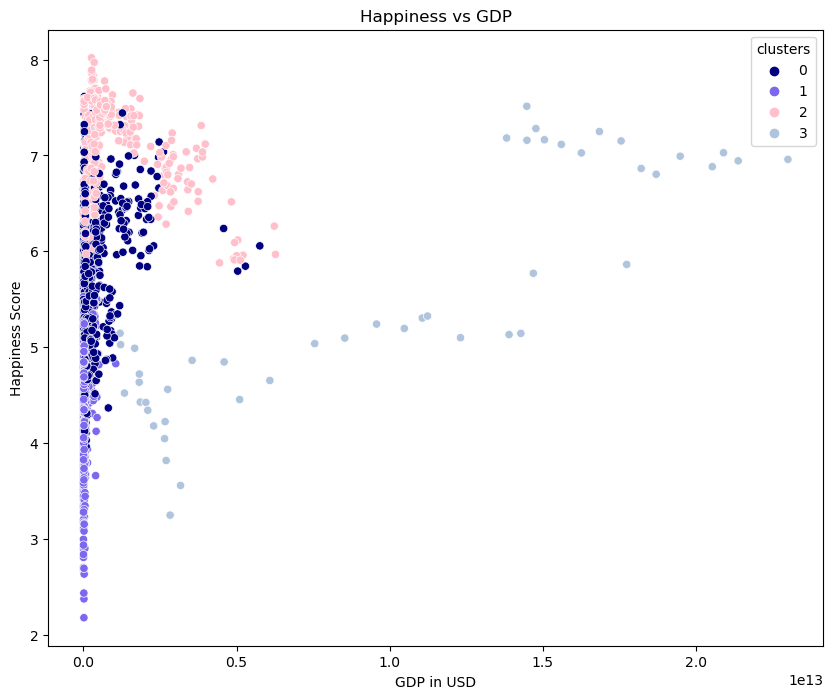

In [28]:
# plotting gdp vs happiness 
plt.figure(figsize = (10,8))
hap_v_gdp_scatter = sns.scatterplot(x = df_whia_pca_kmeans['gdp_usd'], y=df_whia_pca_kmeans['happiness_score'], hue = df_whia_pca_kmeans['clusters'], palette = ['navy', 'mediumslateblue', 'pink', 'lightsteelblue'])
plt.ylabel('Happiness Score')
plt.xlabel('GDP in USD')
plt.title('Happiness vs GDP')

The countries with the highest GDP are all in cluster 2, which spans a wide range of happiness scores. Cluster 3 has the highest happiness scores, but are towards the lower end of the GDP spectrum. This may look different if cluster 2 were removed from the graph since cluster 2 countries throw drastically change the scale of the graph. Countries from cluster 0 ahave the lowest happiness scores and the lowest GDP. It appears that while GDP does have an effect on happiness, it is not an all encompassing factor.

Text(0.5, 1.0, 'K-means Clustering with PCA Standardization')

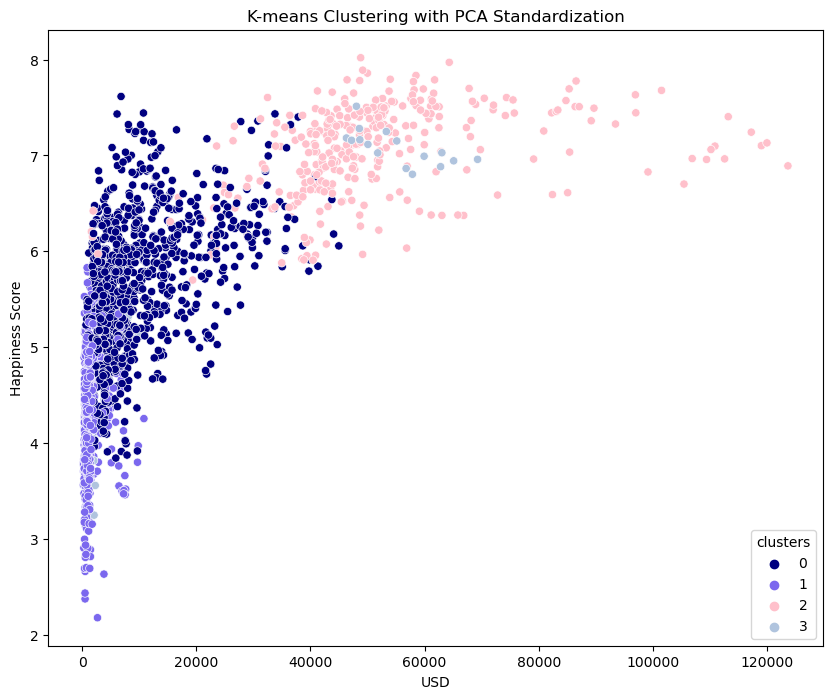

In [38]:
# plotting gdp per capita vs happiness 
plt.figure(figsize = (10,8))
hap_v_gdp_scatter = sns.scatterplot(x = df_whia_pca_kmeans['gdp_capita_usd'], y=df_whia_pca_kmeans['happiness_score'], hue = df_whia_pca_kmeans['clusters'], palette = ['navy', 'mediumslateblue', 'pink', 'lightsteelblue'])
plt.ylabel('Happiness Score')
plt.xlabel('USD')
plt.title('K-means Clustering with PCA Standardization')

Countries in cluster 2 are now completely lost in the fray and show no real correlation. Countries in cluster 3 have the highest GDP per capita and the highest happiness scores. Countries in cluster 1 have a mid range of GDP per capita and a mid range of happiness. Countries from cluster 0 has the lowest GDP per capita and lowest happiness scores. It appears that correlation between GDP per capita and happiness changes depending on which GDP bracket a country is in. While there is a clear positive correlation within cluster 1, the other 3 clusters do not appear to corrlate at all. 

Text(0.5, 1.0, 'Happiness vs Freedom')

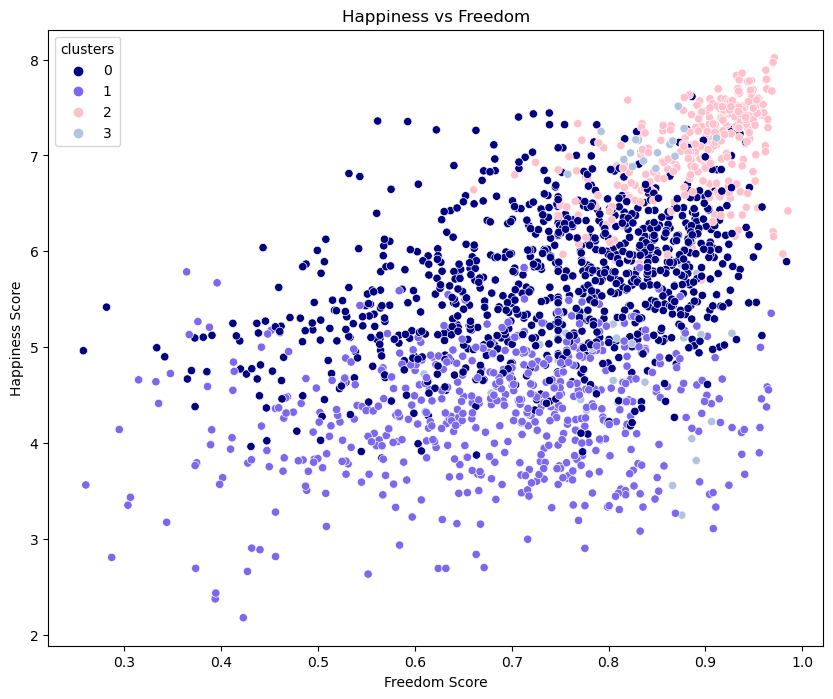

In [30]:
# plotting freedom vs happiness 
plt.figure(figsize = (10,8))
hap_v_gdp_scatter = sns.scatterplot(x = df_whia_pca_kmeans['freedom_score'], y=df_whia_pca_kmeans['happiness_score'], hue = df_whia_pca_kmeans['clusters'], palette = ['navy', 'mediumslateblue', 'pink', 'lightsteelblue'])
plt.ylabel('Happiness Score')
plt.xlabel('Freedom Score')
plt.title('Happiness vs Freedom')

Countries in cluster 2 are spread throughout the dataset, but score above 0.6 in freedom. Countries from clusters 2 and 3 run the gambet in freedom score, but countries in cluster 3 have hgiher happiness rating than those in cluster 0. Cluster 3 countries have the highest average freedom and happines scores

Text(0.5, 1.0, 'Happiness vs Generosity')

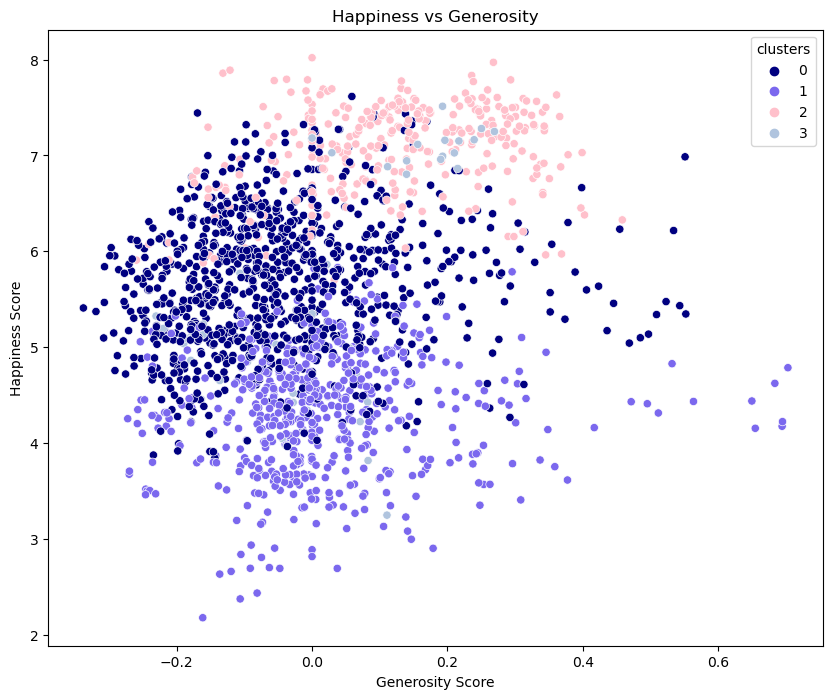

In [31]:
# plotting generosity vs happiness 
plt.figure(figsize = (10,8))
hap_v_gdp_scatter = sns.scatterplot(x = df_whia_pca_kmeans['generosity_score'], y=df_whia_pca_kmeans['happiness_score'], hue = df_whia_pca_kmeans['clusters'], palette = ['navy', 'mediumslateblue', 'pink', 'lightsteelblue'])
plt.ylabel('Happiness Score')
plt.xlabel('Generosity Score')
plt.title('Happiness vs Generosity')

The results follow that same pattern as above in terms of happiness. There is little correlation even within the clusters

Text(0.5, 1.0, 'K-means Clustering with PCA Standardization')

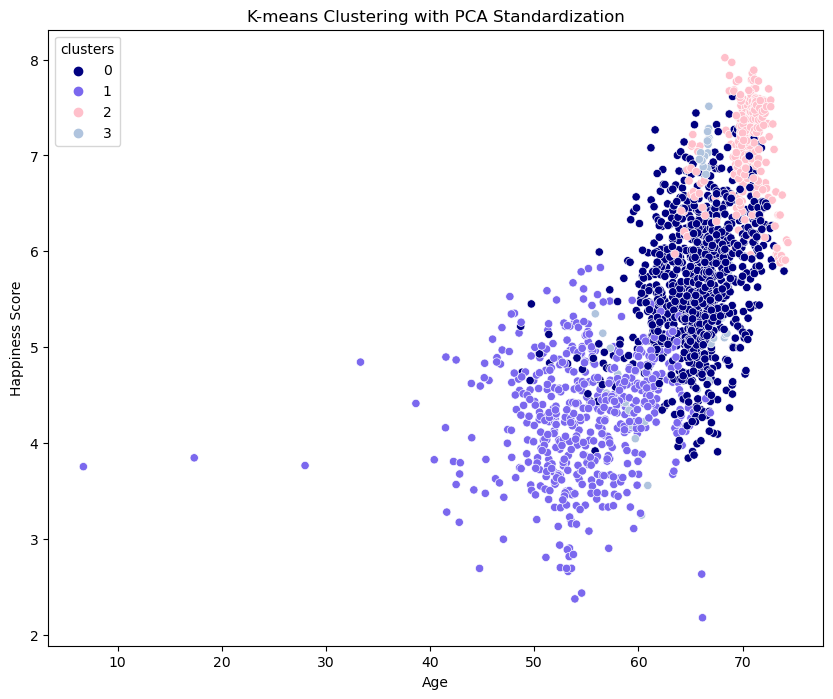

In [36]:
# plotting Life expectency vs happiness 
plt.figure(figsize = (10,8))
hap_v_gdp_scatter = sns.scatterplot(x = df_whia_pca_kmeans['life_expectancy_at_birth'], y=df_whia_pca_kmeans['happiness_score'], hue = df_whia_pca_kmeans['clusters'], palette = ['navy', 'mediumslateblue', 'pink', 'lightsteelblue'])
plt.ylabel('Happiness Score')
plt.xlabel('Age')
plt.title('K-means Clustering with PCA Standardization')

The correlation between life expectancy and happiness becomes more positive as we move from the least happy to most happy cluster. Cluster 3 appears to have the highest life expectancy followed by 1 then 0. Again, cluster 2 is all over the place, but has 2 clear groups, one with a expectancy around 57 and the other with an expectancy around 63. The higher group is happier.

Text(0.5, 1.0, 'Social Support vs GDP per Capita')

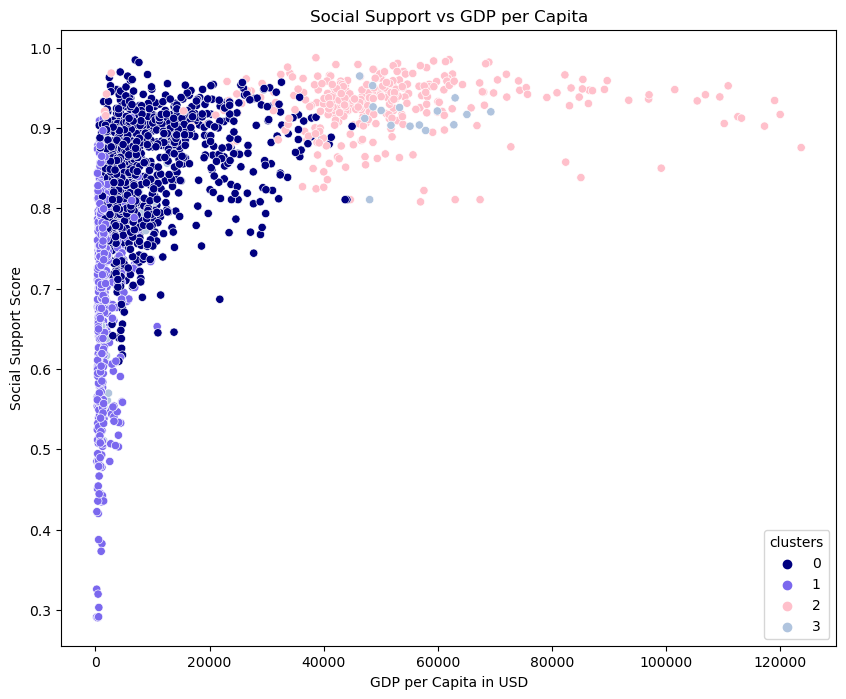

In [33]:
# plotting social support vs gdp per capita 
plt.figure(figsize = (10,8))
hap_v_gdp_scatter = sns.scatterplot(x = df_whia_pca_kmeans['gdp_capita_usd'], y=df_whia_pca_kmeans['social_support_score'], hue = df_whia_pca_kmeans['clusters'], palette = ['navy', 'mediumslateblue', 'pink', 'lightsteelblue'])
plt.ylabel('Social Support Score')
plt.xlabel('GDP per Capita in USD')
plt.title('Social Support vs GDP per Capita')

This graph follows similar patterns to those seen in the Happiness vs GDP per Capita graph. It appears that social support and GDPPC are only correlated within a certain bracket of income. 

# 5. Discussion

The clusters generally make sense. Cluster 3 contains countries with the highest metrics while cluster 0 contains countries with the lowest matrics. Cluster 1 is reliably in the middle. Cluster 2 is a bit of a wild card and is usually spread through a graph. It would be interesting to see what countries are in that cluster.

# 6. Descriptive Statistics

In [34]:
# getting the columns 
df_whia_pca_kmeans.columns

Index(['happiness_score', 'log_gdp_score', 'social_support_score',
       'life_expectancy_at_birth', 'freedom_score', 'generosity_score',
       'corruption_score', 'gdp_usd', 'gdp_capita_usd', 'population',
       'clusters', 'Component 1', 'Component 2', 'Component 3', 'Component 4'],
      dtype='object')

In [35]:
df_whia_pca_kmeans.groupby('clusters').agg({'happiness_score':['mean','median'], 
                                            'log_gdp_score':['mean','median'], 
                                            'social_support_score':['mean','median'],
                                            'life_expectancy_at_birth':['mean','median'], 
                                            'freedom_score':['mean','median'], 
                                            'generosity_score':['mean','median'],
                                            'corruption_score':['mean','median'], 
                                            'gdp_usd':['mean','median'], 
                                            'gdp_capita_usd':['mean','median'], 
                                           'population':['mean','median']})

happiness_score           log_gdp_score             \
                    mean    median          mean     median   
clusters                                                      
0               5.674746  5.693946      9.688543   9.659283   
1               4.296846  4.347544      8.025865   7.966898   
2               7.057680  7.130809     10.850103  10.815147   
3               5.532277  5.144977      9.591233   9.347538   

         social_support_score           life_expectancy_at_birth             \
                         mean    median                     mean     median   
clusters                                                                      
0                    0.849710  0.859361                65.594212  65.800003   
1                    0.687133  0.707847                54.939507  54.825001   
2                    0.927847  0.935351                70.432291  70.775002   
3                    0.769050  0.787712                64.135417  66.395000   

         freedom_score           generosity_score           corruption_score  \
                  mean    median             mean    median             mean   
clusters                                                                       
0             0.740032  0.761964        -0.048316 -0.069783         0.818212   
1             0.681686  0.704219         0.019072 -0.000196         0.780174   
2             0.893198  0.908303         0.118291  0.119298         0.459741   
3             0.818256  0.824385         0.013310  0.011119         0.752467   

                         gdp_usd               gdp_capita_usd                \
            median          mean        median           mean        median   
clusters                                                                      
0         0.831331  2.688680e+11  6.051604e+10   10021.785340   6967.375043   
1         0.810591  5.319954e+10  1.589007e+10    1557.268107   1085.487152   
2         0.436434  1.016960e+12  4.301910e+11   51336.000870  47764.071510   
3         0.745195  9.724320e+12  1.002306e+13   21245.183450   7328.227543   

            population                
                  mean        median  
clusters                              
0         2.775751e+07  9.771112e+06  
1         3.495522e+07  1.644985e+07  
2         2.284834e+07  8.713295e+06  
3         9.892004e+08  1.288222e+09

These results can be used to see which aspects are highest with the least and most happy countries. These trend could inspire further characterisitcs to pull in for investigation. For example, the least happy cluster as the second highest average corruption score. It may be interesting to see if there is a correlation been politial unrest, corruption scores, and happiness.